In [2]:
from amazon_product_review_scraper import amazon_product_review_scraper

In [3]:
review_scraper=amazon_product_review_scraper(
amazon_site='amazon.in',product_asin='B08L5VJYV7')

/Users/rajeshprabhakar/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Total reviews (all pages): 792


In [4]:
reviewsdf=review_scraper.scrape()

Total pages: 80
Start page: 1; End page: 80

Started!


  0%|          | 0/80 [00:00<?, ?it/s]

/Users/rajeshprabhakar/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.amazon.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Not able to scrape page 33 (CAPTCHA is not bypassed)
Not able to scrape page 45 (CAPTCHA is not bypassed)
Not able to scrape page 49 (CAPTCHA is not bypassed)
Not able to scrape page 60 (CAPTCHA is not bypassed)
Completed!


In [5]:
reviewsdf.to_csv('iphone12reviews.csv')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
reviews=reviewsdf.content

In [9]:
reviews.head()

0    My girlfriend demanded me this iphone... And n...
1    Worst battery performance.. Iphone 11 is far b...
2    Another beauty from Apple. I was upgraded from...
3    Sold kidney bought this, now not feeling well ...
4    This was my first switch to an ios device afte...
Name: content, dtype: object

In [14]:
reviews=pd.DataFrame(reviews)

In [11]:
from textblob import TextBlob

In [12]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
reviews['sentiment']=[str(analyze_sentiment(x))
                     for x in reviews.content]

<AxesSubplot:>

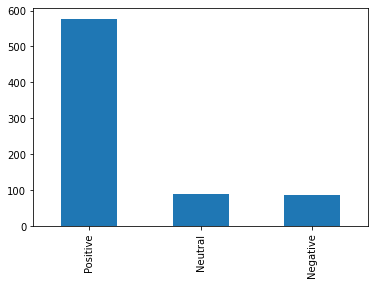

In [18]:
reviews.sentiment.value_counts().plot(kind='bar')

In [22]:
reviews.shape

(752, 2)

In [20]:
# Term Frequency Inverse Document Frequency - Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),
                     min_df=0,stop_words='english',
                     max_features=300)

In [25]:
tfidfmatrix=tfidf.fit_transform(reviews.content)

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans=KMeans(n_clusters=5).fit(tfidfmatrix)

In [30]:
reviews['kmeans']=kmeans.labels_

In [31]:
reviews.head()

,content,sentiment,kmeans
0,My girlfriend demanded me this iphone... And n...,Negative,4
1,Worst battery performance.. Iphone 11 is far b...,Negative,0
2,Another beauty from Apple. I was upgraded from...,Positive,4
3,"Sold kidney bought this, now not feeling well ...",Positive,3
4,This was my first switch to an ios device afte...,Positive,0


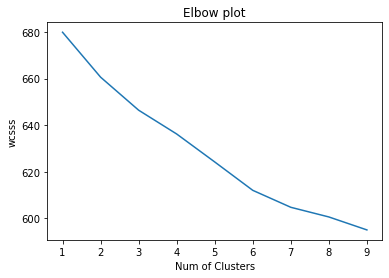

In [43]:
wcsslist=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(tfidfmatrix)
    wcsslist.append(kmeans.inertia_)
plt.plot(range(1,10),wcsslist)
plt.title('Elbow plot')
plt.xlabel('Num of Clusters')
plt.ylabel('wcsss')
plt.show()

In [44]:
from sklearn.metrics.cluster import silhouette_score

In [53]:
silscore=silhouette_score(tfidfmatrix,
                         kmeans.labels_,
                         metric='euclidean',
                         sample_size=752)

In [54]:
silscore

0.055059121653549946

In [55]:
# Hierarchical Clustering - Output - Dendogram
# Distance based method 
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
dist=1-cosine_similarity(tfidfmatrix)
# Textmining - Ward method of clustering which is agglomerative clustering
# method. 
# Agglomerative Clustering - At each stage pair of clusters with minimum
# distance are merged.

In [58]:
from scipy.cluster.hierarchy import ward, dendrogram

In [59]:
linkage_matrix=ward(dist)

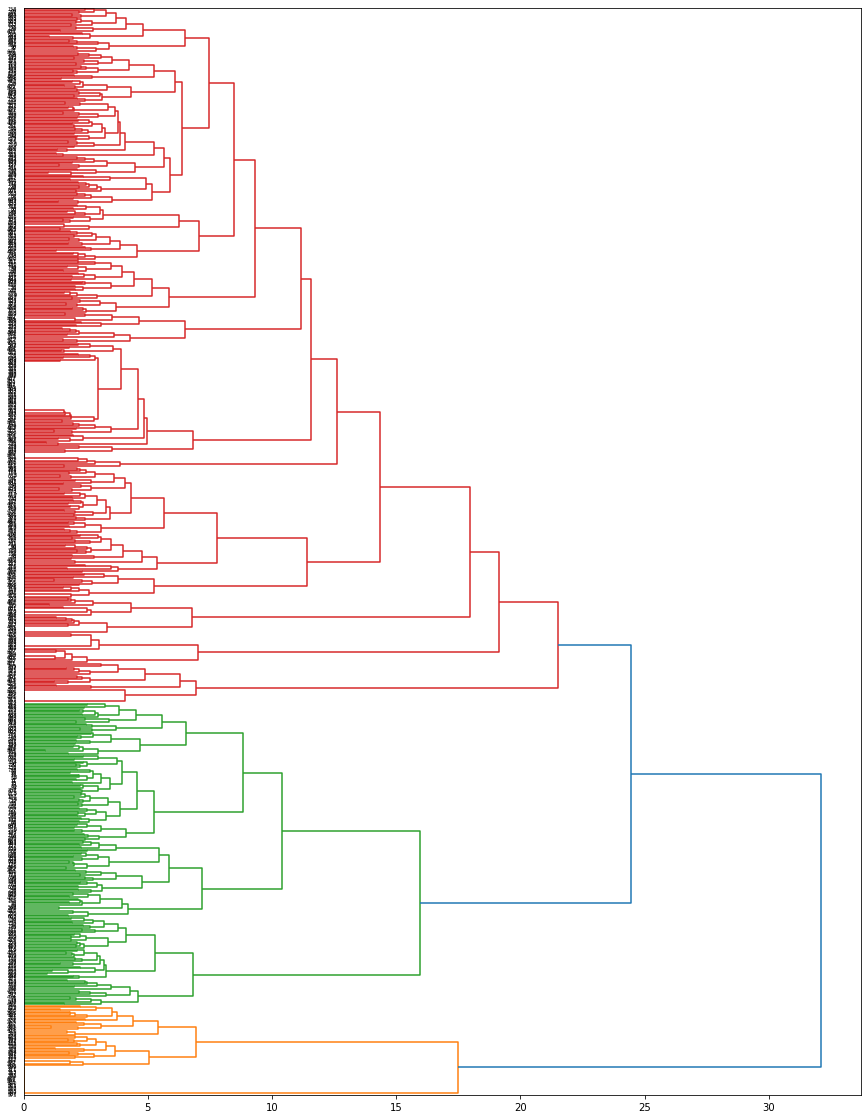

In [63]:
fig,ax=plt.subplots(figsize=(15,20))
ax=dendrogram(linkage_matrix,orientation='right')

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
hclust=AgglomerativeClustering(n_clusters=4).fit(
    tfidfmatrix.toarray())

In [79]:
reviews['hclust']=hclust.labels_

In [81]:
reviews.hclust.value_counts()

0    700
3     20
2     18
1     14
Name: hclust, dtype: int64

In [89]:
reviewsdata=pd.DataFrame(tfidfmatrix)

In [92]:
reviewsdata.columns=['tfidf']

In [94]:
reviewsdata['sentiment']=reviews.sentiment

In [95]:
y=reviewsdata.sentiment
X=reviewsdata.drop('sentiment',axis=1)

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
y=le.fit_transform(y)

In [105]:
y

array([0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [96]:
from sklearn.linear_model import LogisticRegression

In [106]:
logit=LogisticRegression(multi_class='multinomial').fit(tfidfmatrix,
                                                        reviews.sentiment)

In [107]:
logit.score(tfidfmatrix,reviews.sentiment) # Accuracy from Confusion Matrix

0.839095744680851

In [108]:
logitpredict=logit.predict(tfidfmatrix)

In [109]:
pd.crosstab(reviews.sentiment,logitpredict)

col_0,Negative,Neutral,Positive
sentiment,,,
Negative,32,1,54
Neutral,1,22,65
Positive,0,0,577


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(reviews.sentiment,logitpredict))

              precision    recall  f1-score   support

    Negative       0.97      0.37      0.53        87
     Neutral       0.96      0.25      0.40        88
    Positive       0.83      1.00      0.91       577

    accuracy                           0.84       752
   macro avg       0.92      0.54      0.61       752
weighted avg       0.86      0.84      0.80       752



In [112]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
tree=DecisionTreeClassifier()

In [118]:
treemodel=tree.fit(tfidfmatrix,reviews.sentiment)

In [119]:
treemodel.score(tfidfmatrix,reviews.sentiment)

0.9787234042553191

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cross_val_score(tree,tfidfmatrix,reviews.sentiment,cv=5)

array([0.75496689, 0.77483444, 0.72      , 0.77333333, 0.76      ])

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
multinomNB=MultinomialNB()

In [124]:
NBmodel=multinomNB.fit(tfidfmatrix,reviews.sentiment)

In [125]:
NBmodel.score(tfidfmatrix,reviews.sentiment)

0.7938829787234043

In [128]:
import nltk

In [130]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True